# Ford GoBike System Data

## by (Amr saeed)

> This data set of information about individual rides made in a bike-sharing system from the greater San Francisco Bay area. this dataset consist of 183412 trip,db image taken @2019

## Investigation Overview

> In analytics, what I want is to show the analytical differences between the different elements in the available data
How does the trip time affect the location of its start and the gender of the rider

## Dataset Overview

> the structure of data has 16 features and 183412 trip those are
(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).

#### I had  
#### 1- drop null vlaues 
#### 2- scaling duration in seconds to duration in minutes 
#### 3- dropping [other] type of gender for simplecity
#### 4- scaling [member_birth_year] feature to [member_age]

In [15]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [16]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv') #reading data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [17]:
#cleanning section 
df = df.dropna() #drop null
#changing data type
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.start_station_name = df['start_station_name'].astype(str)
index_names = df[ df['member_gender'] == "Other" ].index
df.drop(index_names, inplace = True)
df['member_age'] = 2022 - df['member_birth_year']
data=df
data['duration_min'] = data['duration_sec']/60

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Trip Duration in Minute

### as we see the first plot is not clear enough to fitch the most tripes duration distribution so I took the duration only to the range of 100 minute to provide better clearance

## conclusion 
#### the most trips are between 5 to 15 minutes (as the normal distribution centered) and shown above

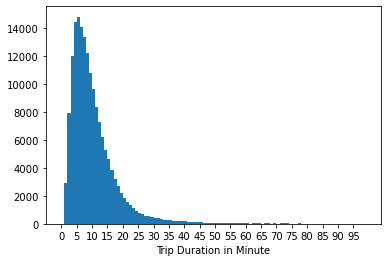

In [18]:
bins = np.arange(0, 100, 1)
ticks = np.arange(0, 100, 5)
plt.hist(data=data, x='duration_min', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

## plotting top 60 start trip distinations

### the top distnation is ("market St") & ("san francisco Station 2") 

## I conclude that those two stations have the highest population so we need to provide more bikes 

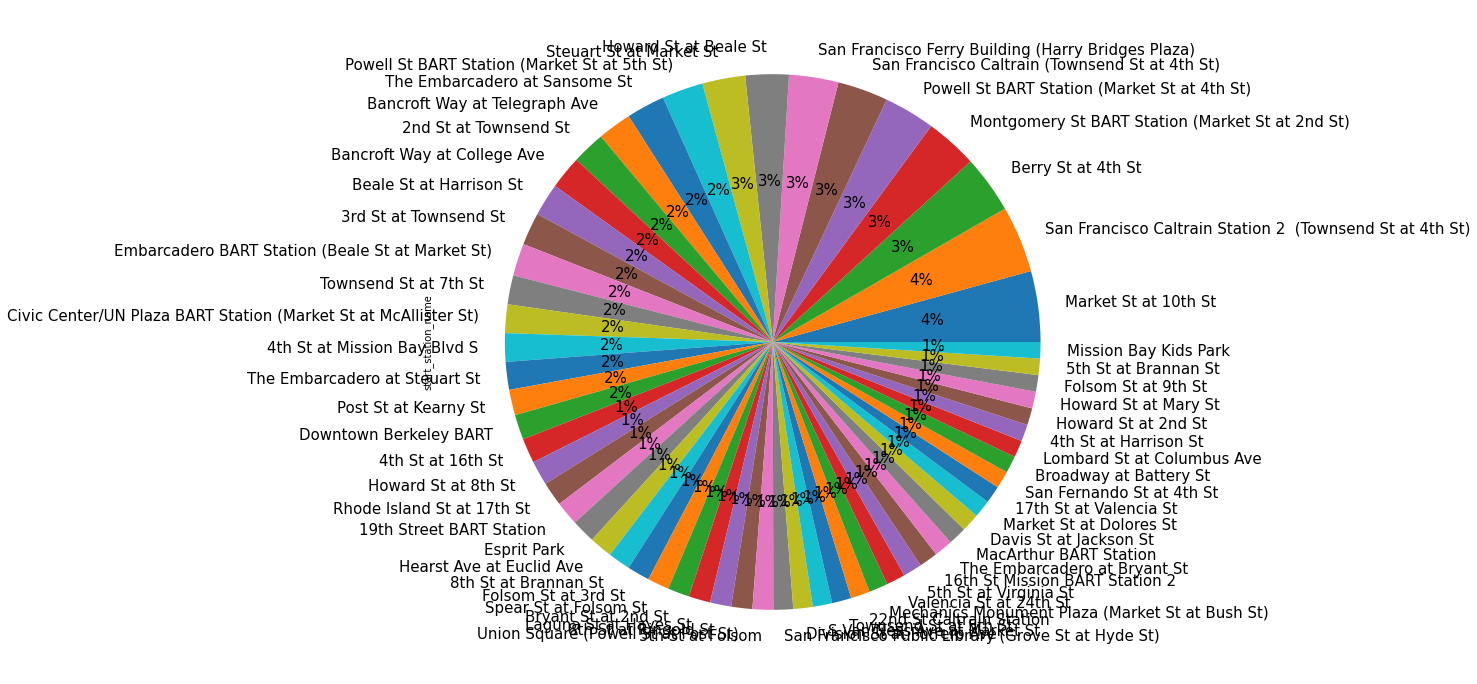

In [19]:
df.start_station_name.value_counts()[:60].plot.pie(figsize=(12,18), fontsize= 15, autopct='%.0f%%');

## plotting the start hour of the trip

## The trip distribution over day hours peaks around two timeframes, 7am-9am and 4pm-6pm, during typical rush hours.

 

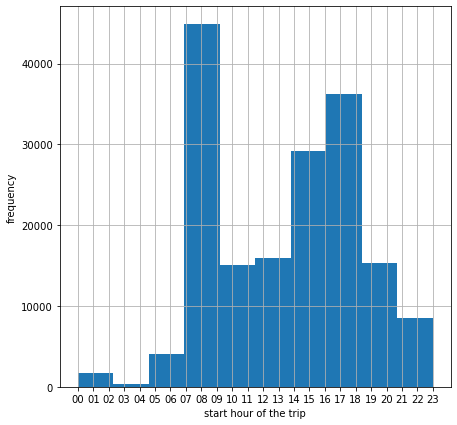

In [20]:
df.start_time.dt.strftime('%H').sort_values().hist(figsize=(7,7))
plt.xlabel('start hour of the trip');
plt.ylabel('frequency');

# trip duration according to each gender

### stands on the univariate resultes active users grouped at 20:45 years-old 
## concluded that:
##### > 1- the week days are the working and collage days 
##### > 2- the day hours are working start & end hours of work 
##### > 3- that workers and collage students are the top clients 

(0.0, 2000.0)

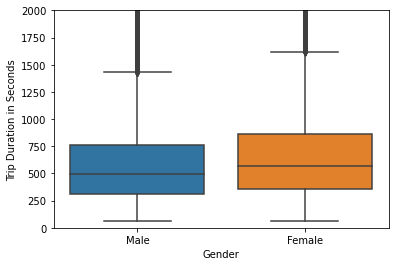

In [21]:
sb.boxplot(data=df, x='member_gender', y='duration_sec')
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Seconds');
plt.ylim([0, 2000])


In [22]:
data = df #copy data 
# filter out outlier ages from visually examination of the count above
data = data.query('member_age <= 85')
# transforming the type of member age to integer
data['member_age'] = data['member_age'].astype('int')
# add new columns for trip duration in minute, trip start date in yyyy-mm-dd format,
# trip start hour of the day, day of week 
data['start_date'] = data.start_time.dt.strftime('%Y-%m-%d')
data['start_hour'] = data.start_time.dt.strftime('%H')
data['start_day'] = data.start_time.dt.strftime('%A')

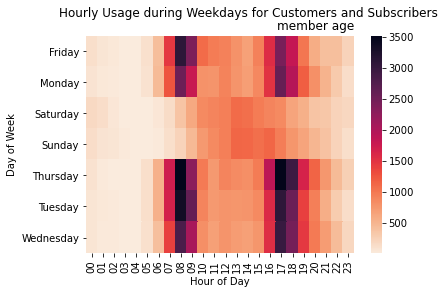

In [23]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')
customers = data.query('member_age < 45 & member_age > 20')
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('member age', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

# conclusion

### > from previous plot we get that the male users are usimg more rides while comparing with female and other with long durations , other types of customers are taking long rides while they are older (50 - 60)


### >The multivariate exploration confirmed the previous explorations and figures.  
### >The rides are mainly concentrated on rush hours Monday through Friday, 
### indicates that workers and collage students are the top clients, 
### >The longest rides are in weekends due to jamming. 
### the number of users for male is higher but percentage is higher for women in trip duration.

### > the week days are the working and collage days 
### > the day hours are working start & end hours of work 
### >  that workers and collage students are the top clients 

### > the top crowded station at rush hours varing from the the crowded station during the day
# and
### > I conclude that people avoid crowds at peak times unless the trip is a working or study trip

In [30]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1042178 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\AlMO\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\AlMO\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\AlMO\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\AlMO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\AlMO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:

In [29]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --template output_toggle.tpl --post serve

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
Traceback (most recent call last):
  File "C:\Users\AlMO\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\AlMO\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\AlMO\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\AlMO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\AlMO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\AlMO\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 489, in convert_single_notebook
    output, resources = self.export_single_notebook(notebook_filename, 